# Taller 4a
Importamos librerías necesarias:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

## Misión 0

Cargamos la base de datos y visualizamos su formato:

In [2]:
df = pd.read_csv("data.csv")
display(df.head())
display(df.describe())

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,2008,1,1,29.63,NaN,NaN
1,2008,1,2,21.46,NaN,NaN
2,2008,1,3,24.25,NaN,NaN
3,2008,1,4,29.04,NaN,NaN
4,2008,1,5,30.17,NaN,NaN


,Year,Month,Day,O3,PM2.5
count,2984.000000,2984.000000,2984.000000,2878.000000,2725.000000
mean,2011.592493,6.419236,15.715818,16.313767,28.814594
std,2.357040,3.487660,8.804066,7.995680,17.479388
min,2008.000000,1.000000,1.000000,1.000000,5.000000
25%,2010.000000,3.000000,8.000000,9.392500,16.170000
50%,2012.000000,6.000000,16.000000,16.960000,23.210000
75%,2014.000000,9.000000,23.000000,22.357500,37.210000
max,2016.000000,12.000000,31.000000,56.300000,126.200000


## Misión 1

### Valores extremos
Visualizamos los datos para ``O3``:

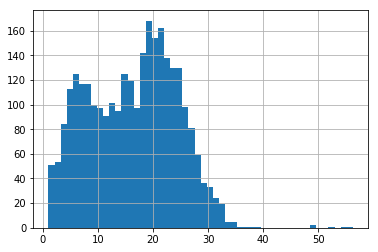

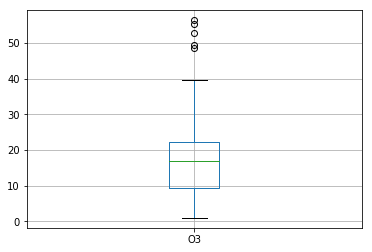

In [3]:
df["O3"].hist(bins=50)
plt.show()
df.boxplot(column = "O3")
plt.show()

Hay ciertos datos que se escapan bastante del máximo no atípico mostrado en el diagrama de caja, además de parecer que son pocos en cantidad. En efecto, los siguientes son los datos cuya medición de ``O3`` es mayor que 40:

In [4]:
display(df[df["O3"] > 40])

,Year,Month,Day,O3,PM2.5,Environmental_risk
1715,2012,9,11,48.57,26.23,medio
1716,2012,9,12,52.86,43.88,medio
1717,2012,9,13,55.18,31.46,medio
1718,2012,9,14,56.30,13.69,extremo
2195,2014,1,4,49.50,95.88,Alto


Como son solo 5 datos de un total de 2984, se decidirá eliminar estos valores extremos de la base de datos para este caso.

In [5]:
df.drop(df[df["O3"] > 40].index, inplace=True)

Volvemos a visualizar:

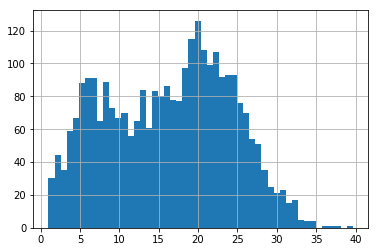

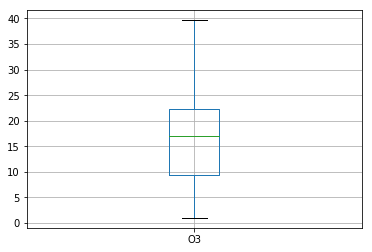

In [6]:
df["O3"].hist(bins=50)
plt.show()
df.boxplot(column = "O3")
plt.show()

Visualizamos los datos para ``PM2.5``:

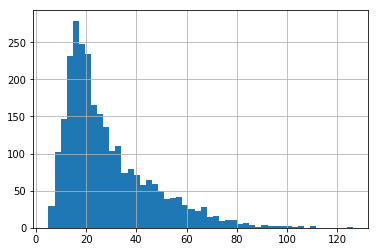

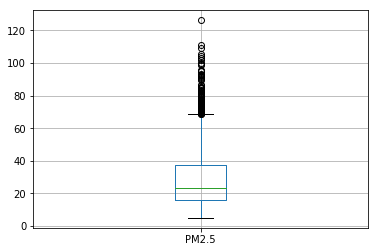

In [7]:
df["PM2.5"].hist(bins=50)
plt.show()
df.boxplot(column = "PM2.5")
plt.show()

Para este caso, no es tan identificable un conjunto de datos que disten significativamente del máximo no atípico. Además, la distribución tiene un comportamiento similar a una Log-Normal, por lo que para este caso utilizaremos una transformación logarítmica para anular el efecto de los valores extremos:

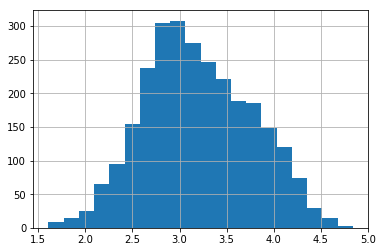

In [8]:
df["PM2.5_log"] = np.log(df["PM2.5"])
df["PM2.5_log"].hist(bins=20)
plt.show()

Ahora la distribución se ve mucho más cerca de una normal y el efecto de los valores extremos ha disminuido significativamente.

### Datos faltantes
Veamos cuántos datos faltantes hay en cada columna de interés:

In [9]:
print(f"N° de datos df: {len(df)}")
display(df[["O3", "PM2.5"]].apply(lambda x: sum(x.isnull()), axis=0))

N° de datos df: 2979


O3       106
PM2.5    259
dtype: int64

Creamos un nuevos DataFrame ``df2`` en el que se completan los datos faltantes con la media:

In [10]:
df2 = df.copy()
df2["O3"].fillna(df2["O3"].mean(), inplace=True)
media_PM25 = df2["PM2.5"].mean()
df2["PM2.5"].fillna(media_PM25, inplace=True)
df2["PM2.5_log"].fillna(np.log(media_PM25), inplace=True)
print(f"N° de datos df2: {len(df2)}")
display(df2[["O3", "PM2.5_log"]].apply(lambda x: sum(x.isnull()), axis=0))

N° de datos df2: 2979


O3           0
PM2.5_log    0
dtype: int64

Creamos un nuevos DataFrame ``df3`` en el que se eliminan los datos faltantes en vez de completar con la media:

In [11]:
df3 = df.copy()
df3.dropna(subset=["O3", "PM2.5_log"], inplace=True)
print(f"N° de datos df3: {len(df3)}")
display(df3[["O3", "PM2.5_log"]].apply(lambda x: sum(x.isnull()), axis=0))

N° de datos df3: 2651


O3           0
PM2.5_log    0
dtype: int64

## Misión 2

Estadísticos pedidos para ``df2``:

In [12]:
stats_df2 = df2[["O3", "PM2.5"]].describe().drop(labels=["count","25%","50%","75%"])
stats_df2.loc["kurtosis"] = df2[["O3", "PM2.5"]].kurtosis()
corr_03_PM25 = df2["O3"].corr(df2["PM2.5"])
stats_df2.loc["corr O3 - PM2.5"] = [corr_03_PM25, corr_03_PM25]
display(stats_df2)

,O3,PM2.5
mean,16.250821,28.789938
std,7.716669,16.667372
min,1.000000,5.000000
max,39.650000,126.200000
kurtosis,-0.868417,2.485593
corr O3 - PM2.5,-0.475489,-0.475489


Estadísticos pedidos para ``df3``:

In [13]:
stats_df3 = df3[["O3", "PM2.5"]].describe().drop(labels=["count","25%","50%","75%"])
stats_df3.loc["kurtosis"] = df3[["O3", "PM2.5"]].kurtosis()
corr_03_PM25 = df3["O3"].corr(df3["PM2.5"])
stats_df3.loc["corr O3 - PM2.5"] = [corr_03_PM25, corr_03_PM25]
display(stats_df3)

,O3,PM2.5
mean,15.892422,28.962003
std,7.890672,17.560376
min,1.000000,5.000000
max,39.650000,126.200000
kurtosis,-0.944448,1.937068
corr O3 - PM2.5,-0.495540,-0.495540


## Misión 3
### Histograma de PM2.5
Para ``df2``:

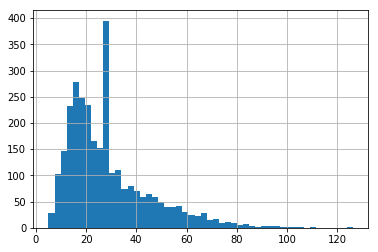

In [14]:
df2["PM2.5"].hist(bins=50) 
plt.show()

Para ``df3``:

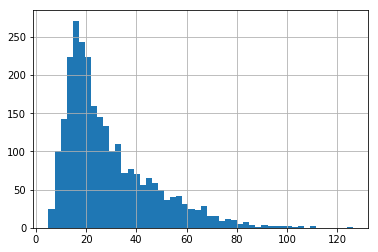

In [15]:
df3["PM2.5"].hist(bins=50) 
plt.show()

### Boxplot de O3 por mes
Para ``df2``:

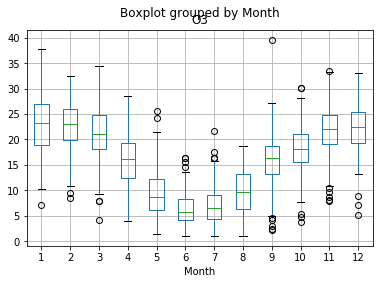

In [16]:
df2.boxplot(column="O3", by = "Month")
plt.show()

Para ``df3``:

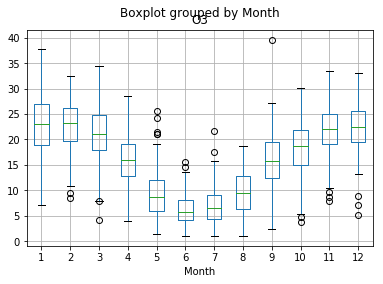

In [17]:
df3.boxplot(column="O3", by = "Month")
plt.show()

### Evolución promedio de O3 y PM2.5 por año

Para ``df2``:

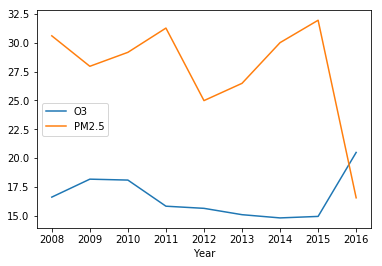

In [18]:
df2[["Year", "O3", "PM2.5"]].groupby("Year").mean().plot()
plt.show()

Para ``df3``:

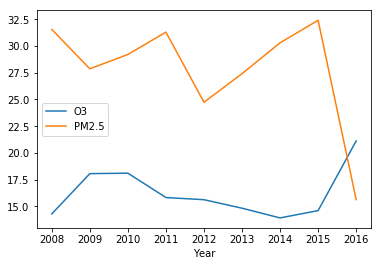

In [19]:
df3[["Year", "O3", "PM2.5"]].groupby("Year").mean().plot()
plt.show()

## Misión 4

Identifiquemos la cantidad de datos nulos y los niveles de riesgos ambientales presentes con su frecuencia:

In [20]:
print(f"Valores NaN df2: {df2['Environmental_risk'].isna().sum()}")
display(df2["Environmental_risk"].value_counts())

Valores NaN df2: 328


medio      1602
Bajo        750
nulo        134
Alto        105
extremo      60
Name: Environmental_risk, dtype: int64

In [21]:
print(f"Valores NaN df3: {df3['Environmental_risk'].isna().sum()}")
display(df3["Environmental_risk"].value_counts())

Valores NaN df3: 0


medio      1602
Bajo        750
nulo        134
Alto        105
extremo      60
Name: Environmental_risk, dtype: int64

Para ``df3``, al eliminar los datos faltantes de ``O3`` y ``PM2.5`` coincidentemente no quedaron valores NaN en ``Environmental_risk``, mientras que en ``df2`` sí quedaron. En cualquier caso, lo relevante a notar es que existe una categoría ``nulo`` en ``Environmental_risk``, la cual podría hacer referencia a que es un dato faltante o desconocido, por lo que lo transformaremos a valor NaN para que sea más sencillo trabajar con ellos.

In [22]:
df2["Environmental_risk"].replace("nulo", np.nan, inplace=True)
df3["Environmental_risk"].replace("nulo", np.nan, inplace=True)

In [23]:
print(f"Valores NaN df2: {df2['Environmental_risk'].isna().sum()}")
display(df2["Environmental_risk"].value_counts())

Valores NaN df2: 462


medio      1602
Bajo        750
Alto        105
extremo      60
Name: Environmental_risk, dtype: int64

In [24]:
print(f"Valores NaN df3: {df3['Environmental_risk'].isna().sum()}")
display(df3["Environmental_risk"].value_counts())

Valores NaN df3: 134


medio      1602
Bajo        750
Alto        105
extremo      60
Name: Environmental_risk, dtype: int64

Visualicemos el comportamiento de los niveles de riesgo ambiental respecto a las variables ``O3`` y ``PM2.5`` (se hará todo usando ``df3``, con ``df2`` se obtienen los mismos comportamientos):

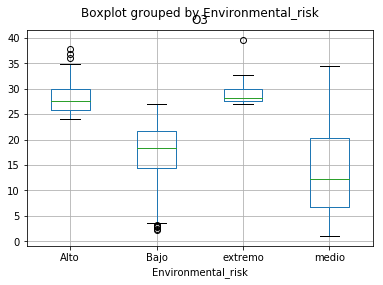

In [25]:
df3.boxplot(column="O3", by = "Environmental_risk")
plt.show()

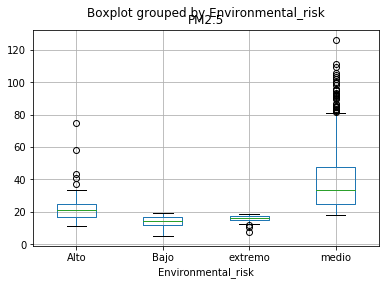

In [26]:
df3.boxplot(column="PM2.5", by = "Environmental_risk")
plt.show()

La última figura no logra mostrar un comportamiento claro del nivel de riesgo respecto a la cantidad de ``PM2.5``, debido a los valores extremos presentes. Sin embargo, la transformación logarítmica implementada en la Misión 1 nos podría ayudar en este caso:

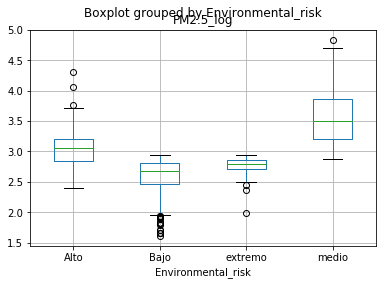

In [27]:
df3.boxplot(column="PM2.5_log", by = "Environmental_risk")
plt.show()

Mucho mejor :)

Hay dos categorías que quizás son más fácil de identificar respecto a las otras usando las variables ``O3`` y ``PM2.5_log``: ``Bajo`` y ``extremo``. Ambas poseen datos con un valor bajo los 2.9 aprox de ``PM2.5_log``, pero la primera tiene datos con un valor bajo los 27 aprox de ``O3``, mientras que la segunda sobre este valor. Por otro lado, pareciera no haber tantos datos de las categorías ``Alto`` y ``medio`` en esos rangos. En efecto, si determinamos las frecuencias de los niveles de riesgo para estos rangos se obtiene lo siguiente:

In [28]:
cond1 = (df3["O3"] < 27) & (df3["PM2.5_log"] < 2.9)
df3[cond1]["Environmental_risk"].value_counts()

Bajo    690
Alto     22
Name: Environmental_risk, dtype: int64

In [29]:
cond2 = (df3["O3"] > 27) & (df3["PM2.5_log"] < 2.9)
df3[cond2]["Environmental_risk"].value_counts()

extremo    51
Alto       14
Name: Environmental_risk, dtype: int64

Para el primer rango, se tiene una probabilidad de 96.91% que la observación tenga un nivel de riesgo ``Bajo``, mientras que para el segundo rango, se tiene una probabilidad de 78.46% que la observación tenga un nivel de riesgo ``extremo``.

La categoría más compleja de desagregar pareciera ser el nivel de riesgo ``Alto``. Su rango más favorable pareciera ser para valores sobre los 2.5 y bajo los 3.7 de ``PM2.5_log`` y sobre los 25 de ``O3``. Sin embargo, determinando las frecuencias de los niveles de riesgo para este rango se obtiene lo siguiente:

In [30]:
df3[(df3["O3"] > 25) & (df3["PM2.5_log"] > 2.5) & ((df3["PM2.5_log"] < 3.7))]["Environmental_risk"].value_counts()

medio      150
Alto        85
extremo     56
Bajo        40
Name: Environmental_risk, dtype: int64

La categoría ``medio`` es preponderante en ese rango y lo es también en la base de datos en general, de acuerdo con las frecuencias totales obtenidas al comienzo de la misión. De hecho, para los datos que no se encuentran en los rangos definidos para los niveles ``Bajo`` y ``extremo`` se tiene que hay un 92.07% de observaciones con nivel de riesgo ``medio`` como se observa a continuación:

In [31]:
cond3 = ~(cond1 | cond2)
df3[cond3]["Environmental_risk"].value_counts()

medio      1602
Alto         69
Bajo         60
extremo       9
Name: Environmental_risk, dtype: int64

De esta manera, el esquema de asignación plnateado es el siguiente:

- Si la cantidad de ``O3`` es mayor que 27 y la cantidad de ``PM2.5`` es menor que 2.9, asignar nivel ``extremo``.
- Si la cantidad de ``O3`` es menor que 27 y la cantidad de ``PM2.5`` es menor que 2.9, asignar nivel ``Bajo``.
- Asignar nivel ``medio`` en otro caso.

Aplicamos el esquema definido para rellenar los datos faltantes:

In [32]:
df3.loc[cond1, "Environmental_risk"] = df3.loc[cond1, "Environmental_risk"].fillna("Bajo")
df3.loc[cond2, "Environmental_risk"] = df3.loc[cond2, "Environmental_risk"].fillna("extremo")
df3.loc[cond3, "Environmental_risk"] = df3.loc[cond3, "Environmental_risk"].fillna("medio")

Tras completar los datos se tienen las siguientes frecuencias de los niveles de riesgo:

In [33]:
print(f"Valores NaN df3: {df3['Environmental_risk'].isna().sum()}")
display(df3["Environmental_risk"].value_counts())

Valores NaN df3: 0


medio      1633
Bajo        853
Alto        105
extremo      60
Name: Environmental_risk, dtype: int64

Rellenamos para ``df2``:

In [34]:
cond1 = (df2["O3"] < 27) & (df2["PM2.5_log"] < 2.9)
cond2 = (df2["O3"] > 27) & (df2["PM2.5_log"] < 2.9)
cond3 = ~(cond1 | cond2)
df2.loc[cond1, "Environmental_risk"] = df2.loc[cond1, "Environmental_risk"].fillna("Bajo")
df2.loc[cond2, "Environmental_risk"] = df2.loc[cond2, "Environmental_risk"].fillna("extremo")
df2.loc[cond3, "Environmental_risk"] = df2.loc[cond3, "Environmental_risk"].fillna("medio")
print(f"Valores NaN df2: {df2['Environmental_risk'].isna().sum()}")
display(df2["Environmental_risk"].value_counts())

Valores NaN df2: 0


medio      1937
Bajo        877
Alto        105
extremo      60
Name: Environmental_risk, dtype: int64